In [3]:
"""
The aim of this code will be to test my analysis of the imperfections araising by the definitiof of
epsilon near symmetry as investigated in Boull\'e et al. 

I plan to make two 'epsilon near symmetric matrices', one with the first singular vector corresponding
to the largest singular value skewed, and a second one with the singular vecotr corresponding to the
smallest singular value to be skewed. I shall then runs some experients to see how well each does.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy

n, r = 100, 10

# We start by making a random symmetric matrix A

rng         = np.random.default_rng(123)
U_A, _      = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')

sing_vals_A = np.logspace(-7, 2, r)[::-1]

A = U_A @ np.diag(sing_vals_A) @ U_A.T

# Define the angle of rotation

theta = 1e-3 # needs to be small for our epsilon-theta relation

# z \perpto span(U_A), unit-norm
z = rng.standard_normal((n, 1))
z -= U_A @ (U_A.T @ z)
z /= np.linalg.norm(z)

V_A_1 = U_A.copy()
c, s = np.cos(theta), np.sin(theta)

# rotate column 0 toward z
v0_rot = c * U_A[:, [0]] + s * z
V_A_1[:, [0]] = v0_rot

# re-orthonormalise the r columns
V_A_1, _ = scipy.linalg.qr(V_A_1, mode="economic")

sigma_min_1 = scipy.linalg.svd(U_A.T @ V_A_1, compute_uv=False)[-1]

print(sigma_min_1)

V_A_2 = U_A.copy()
c, s = np.cos(theta), np.sin(theta)

# rotate column -1 toward z
v0_rot = c * U_A[:, [-1]] + s * z
V_A_2[:, [-1]] = v0_rot

# re-orthonormalise the r columns
V_A_2, _ = scipy.linalg.qr(V_A_2, mode="economic")

sigma_min_2 = scipy.linalg.svd(U_A.T @ V_A_2, compute_uv=False)[-1]

print(sigma_min_2)

# We see that both perturbation yield the same epsilon value

A_1 = U_A @ sing_vals_A @ V_A_1.T
A_2 = U_A @ sing_vals_A @ V_A_2.T






0.9999995000000412
0.9999995000000422


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 100)

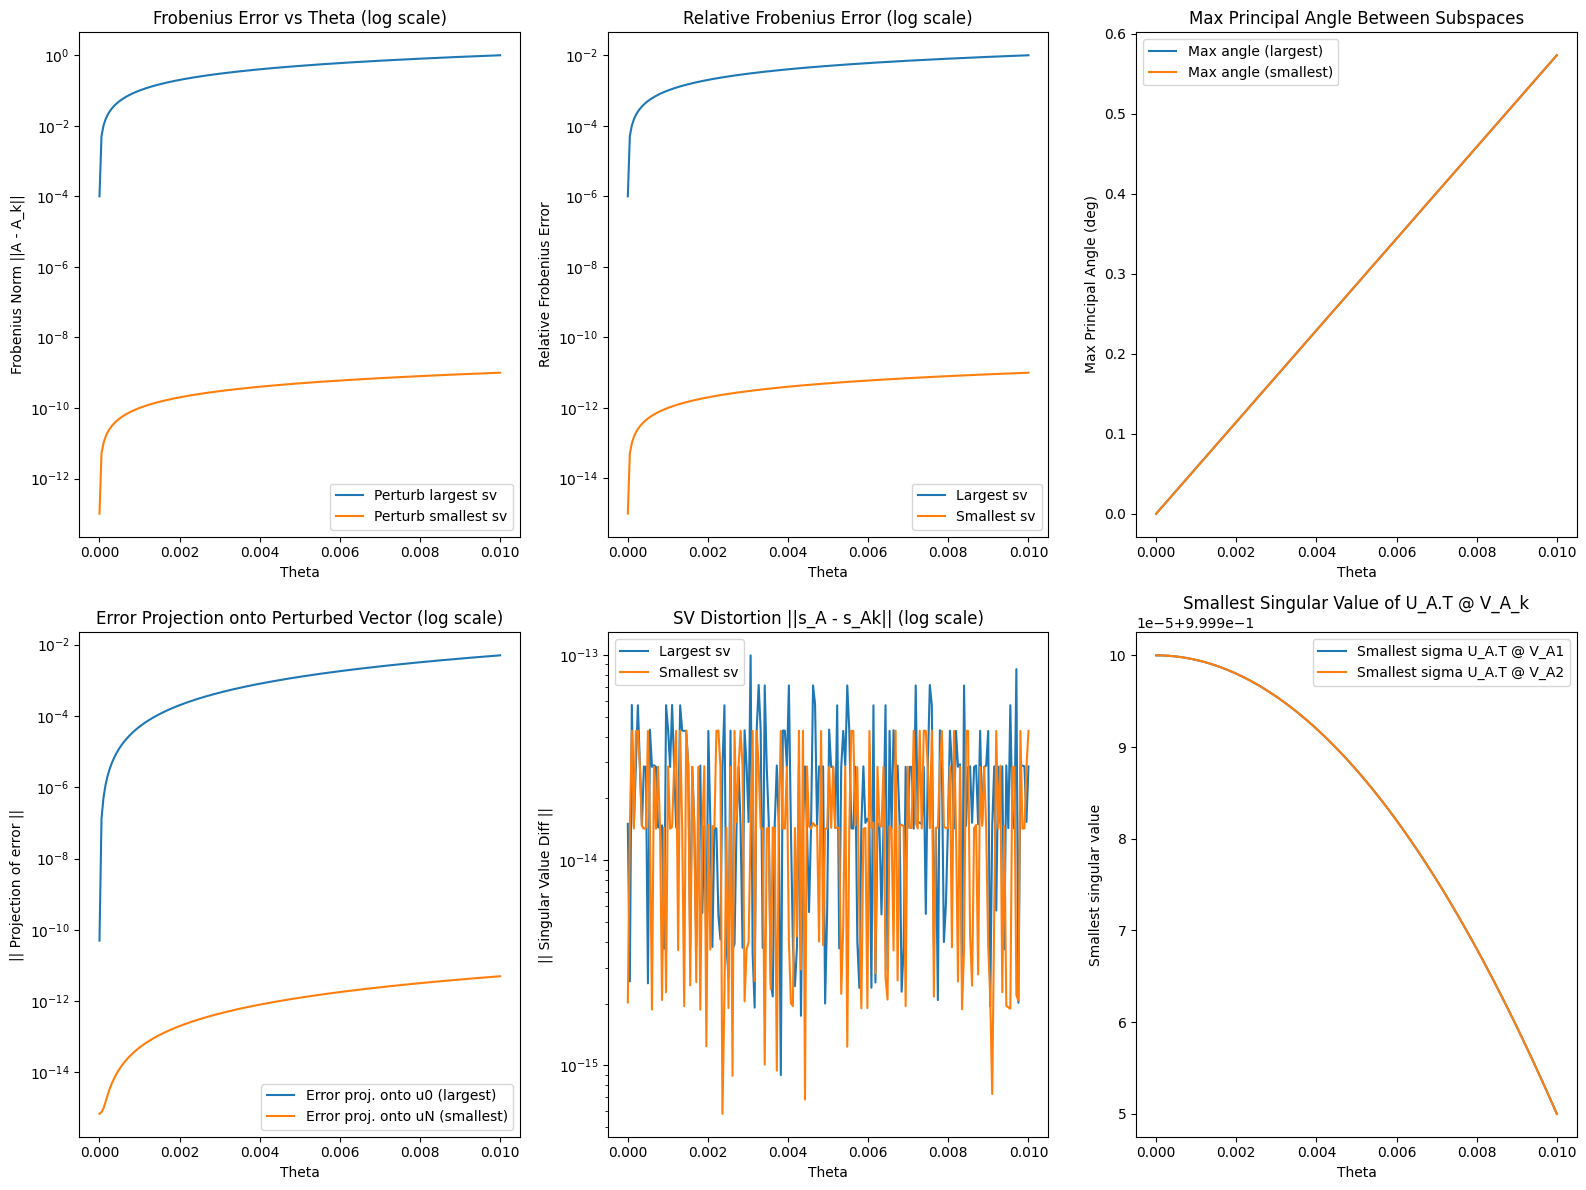


Summary Table for Selected Thetas:
theta	Frob_largest	Frob_smallest	Angle_largest	Angle_smallest	ProjErr_largest	ProjErr_smallest	SVdiff_largest	SVdiff_smallest
1.0e-06	1.00e-04	1.00e-13	5.73e-05	5.73e-05	5.00e-11	6.94e-16	1.50e-14	2.03e-15
1.0e-06	1.00e-04	1.00e-13	5.73e-05	5.73e-05	5.00e-11	6.94e-16	1.50e-14	2.03e-15
1.0e-04	1.01e-02	1.01e-11	5.82e-03	5.82e-03	5.15e-07	9.85e-16	5.71e-14	4.27e-14
1.0e-03	1.01e-01	1.01e-10	5.76e-02	5.76e-02	5.06e-05	5.07e-14	4.33e-14	2.86e-14
1.0e-02	1.00e+00	1.00e-09	5.73e-01	5.73e-01	5.00e-03	5.00e-12	2.87e-14	4.27e-14


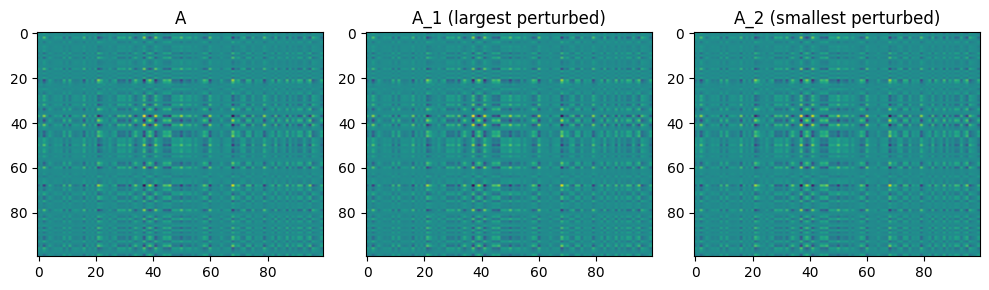

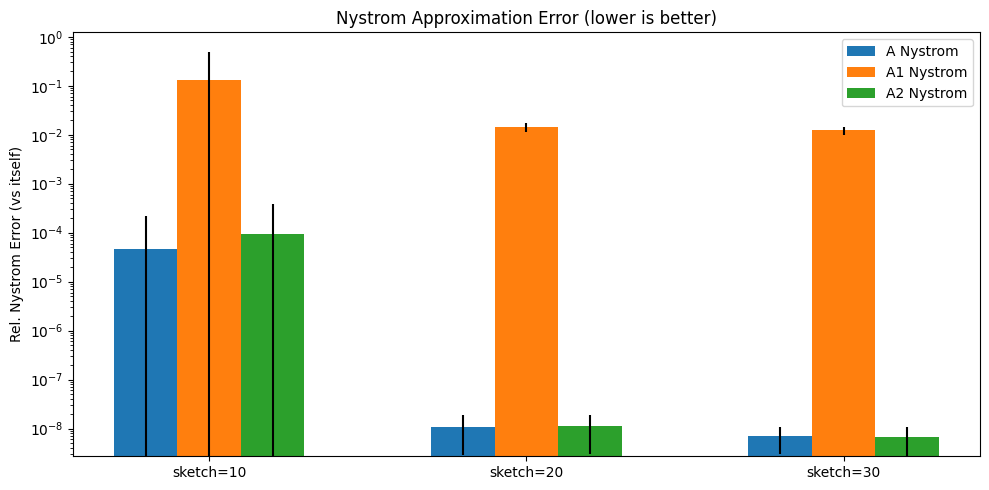

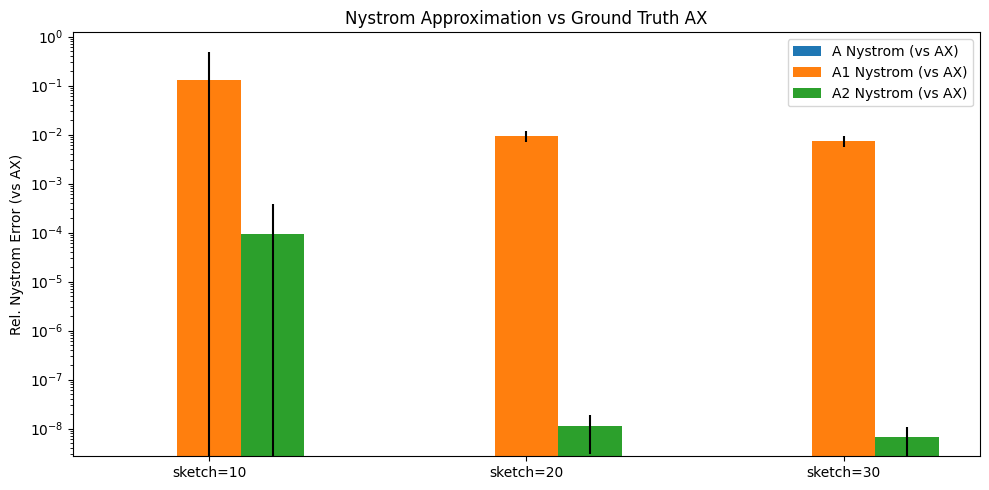

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import subspace_angles

n, r = 100, 10
rng = np.random.default_rng(123)
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)
A = U_A @ S_A @ U_A.T

thetas = np.linspace(1e-6, 1e-2, 200)
err_A1, err_A2 = [], []
spec_A1, spec_A2 = [], []
rel_A1, rel_A2 = [], []
cos1_A1, cos1_A2 = [], []
cosN_A1, cosN_A2 = [], []
sigmin_A1, sigmin_A2 = [], []
max_angle_A1, max_angle_A2 = [], []
err_proj_A1, err_proj_A2 = [], []
sv_dist_A1, sv_dist_A2 = [], []

normA_fro = np.linalg.norm(A, 'fro')
s_A = np.linalg.svd(A, compute_uv=False)

for theta in thetas:
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    # Perturb largest singular vector (col 0)
    V_A1 = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A1[:, [0]] = c * U_A[:, [0]] + s * z
    V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
    sigmin1 = scipy.linalg.svd(U_A.T @ V_A1, compute_uv=False)[-1]
    A1 = U_A @ S_A @ V_A1.T

    # Perturb smallest singular vector (col -1)
    V_A2 = U_A.copy()
    V_A2[:, [-1]] = c * U_A[:, [-1]] + s * z
    V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
    sigmin2 = scipy.linalg.svd(U_A.T @ V_A2, compute_uv=False)[-1]
    A2 = U_A @ S_A @ V_A2.T

    # Metrics: Frobenius, Spectral, Relative errors
    err_A1.append(np.linalg.norm(A - A1, 'fro'))
    err_A2.append(np.linalg.norm(A - A2, 'fro'))
    spec_A1.append(np.linalg.norm(A - A1, 2))
    spec_A2.append(np.linalg.norm(A - A2, 2))
    rel_A1.append(err_A1[-1] / normA_fro)
    rel_A2.append(err_A2[-1] / normA_fro)

    # Cosine similarity between leading and last left singular vectors
    U, _, _ = np.linalg.svd(A)
    U1, _, _ = np.linalg.svd(A1)
    U2, _, _ = np.linalg.svd(A2)
    cos1_A1.append(np.abs(U[:, 0] @ U1[:, 0]))
    cos1_A2.append(np.abs(U[:, 0] @ U2[:, 0]))
    cosN_A1.append(np.abs(U[:, -1] @ U1[:, -1]))
    cosN_A2.append(np.abs(U[:, -1] @ U2[:, -1]))

    # Smallest singular value of overlap matrix
    sigmin_A1.append(sigmin1)
    sigmin_A2.append(sigmin2)

    # Principal angles (max, in degrees)
    angs1 = subspace_angles(U_A, V_A1)
    angs2 = subspace_angles(U_A, V_A2)
    max_angle_A1.append(np.rad2deg(np.max(angs1)))
    max_angle_A2.append(np.rad2deg(np.max(angs2)))

    # Error projected onto perturbed vector
    err_proj_A1.append(np.linalg.norm((A - A1) @ U_A[:, 0]))
    err_proj_A2.append(np.linalg.norm((A - A2) @ U_A[:, -1]))

    # Singular value difference (spectrum distortion)
    s_A1 = np.linalg.svd(A1, compute_uv=False)
    s_A2 = np.linalg.svd(A2, compute_uv=False)
    sv_dist_A1.append(np.linalg.norm(s_A - s_A1))
    sv_dist_A2.append(np.linalg.norm(s_A - s_A2))

# --- Plotting ---

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.plot(thetas, err_A1, label="Perturb largest sv")
plt.plot(thetas, err_A2, label="Perturb smallest sv")
plt.yscale('log')
plt.ylabel('Frobenius Norm ||A - A_k||')
plt.xlabel('Theta')
plt.legend()
plt.title('Frobenius Error vs Theta (log scale)')

plt.subplot(2, 3, 2)
plt.plot(thetas, rel_A1, label="Largest sv")
plt.plot(thetas, rel_A2, label="Smallest sv")
plt.yscale('log')
plt.ylabel('Relative Frobenius Error')
plt.xlabel('Theta')
plt.legend()
plt.title('Relative Frobenius Error (log scale)')

plt.subplot(2, 3, 3)
plt.plot(thetas, max_angle_A1, label='Max angle (largest)')
plt.plot(thetas, max_angle_A2, label='Max angle (smallest)')
plt.ylabel('Max Principal Angle (deg)')
plt.xlabel('Theta')
plt.legend()
plt.title('Max Principal Angle Between Subspaces')

plt.subplot(2, 3, 4)
plt.plot(thetas, err_proj_A1, label='Error proj. onto u0 (largest)')
plt.plot(thetas, err_proj_A2, label='Error proj. onto uN (smallest)')
plt.yscale('log')
plt.ylabel('|| Projection of error ||')
plt.xlabel('Theta')
plt.legend()
plt.title('Error Projection onto Perturbed Vector (log scale)')

plt.subplot(2, 3, 5)
plt.plot(thetas, sv_dist_A1, label="Largest sv")
plt.plot(thetas, sv_dist_A2, label="Smallest sv")
plt.yscale('log')
plt.ylabel('|| Singular Value Diff ||')
plt.xlabel('Theta')
plt.legend()
plt.title('SV Distortion ||s_A - s_Ak|| (log scale)')

plt.subplot(2, 3, 6)
plt.plot(thetas, sigmin_A1, label='Smallest sigma U_A.T @ V_A1')
plt.plot(thetas, sigmin_A2, label='Smallest sigma U_A.T @ V_A2')
plt.ylabel('Smallest singular value')
plt.xlabel('Theta')
plt.legend()
plt.title('Smallest Singular Value of U_A.T @ V_A_k')

plt.tight_layout()
plt.show()

# Optionally, summary table for selected thetas
selected_thetas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
print("\nSummary Table for Selected Thetas:")
print("theta\tFrob_largest\tFrob_smallest\tAngle_largest\tAngle_smallest\tProjErr_largest\tProjErr_smallest\tSVdiff_largest\tSVdiff_smallest")
for t in selected_thetas:
    i = np.argmin(np.abs(thetas - t))
    print(f"{thetas[i]:.1e}\t{err_A1[i]:.2e}\t{err_A2[i]:.2e}\t{max_angle_A1[i]:.2e}\t{max_angle_A2[i]:.2e}\t{err_proj_A1[i]:.2e}\t{err_proj_A2[i]:.2e}\t{sv_dist_A1[i]:.2e}\t{sv_dist_A2[i]:.2e}")

# Optionally, visualize heatmaps for largest theta
idx = -1  # index for largest theta
A1 = U_A @ S_A @ V_A1.T
A2 = U_A @ S_A @ V_A2.T

plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.imshow(A, aspect='auto')
plt.title('A')
plt.subplot(1,3,2)
plt.imshow(A1, aspect='auto')
plt.title('A_1 (largest perturbed)')
plt.subplot(1,3,3)
plt.imshow(A2, aspect='auto')
plt.title('A_2 (smallest perturbed)')
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import subspace_angles, pinv


def nystrom_approx(M, X):
    # M: n x n symmetric matrix
    # X: n x s sketching matrix (s columns sampled/used)
    C = M @ X           # (n x s)
    W = X.T @ M @ X     # (s x s)
    Winv = pinv(W)
    M_tilde = C @ Winv @ C.T
    return M_tilde

def nystrom_error(M, X):
    # || M X - Nystrom(M, X) X ||_F / || M X ||_F
    MX = M @ X
    Mtilde = nystrom_approx(M, X)
    err = np.linalg.norm(MX - Mtilde @ X, 'fro') / np.linalg.norm(MX, 'fro')
    return err

n_sketches = 25  # number of random sketches to average
sketch_sizes = [r, 2*r, 3*r]
results_nystrom = []
results_truth = []

for s in sketch_sizes:
    err_N_A = []
    err_N_A1 = []
    err_N_A2 = []
    err_GT_A = []
    err_GT_A1 = []
    err_GT_A2 = []
    for i in range(n_sketches):
        X = np.random.randn(n, s)
        # Nystrom approximations
        At_X   = nystrom_approx(A, X)   @ X
        At1_X  = nystrom_approx(A1, X)  @ X
        At2_X  = nystrom_approx(A2, X)  @ X
        AX     = A @ X
        # Nystrom error: how close is M X to its own approximation
        err_N_A.append(np.linalg.norm(AX - At_X, 'fro') / np.linalg.norm(AX, 'fro'))
        err_N_A1.append(np.linalg.norm(A1 @ X - At1_X, 'fro') / np.linalg.norm(A1 @ X, 'fro'))
        err_N_A2.append(np.linalg.norm(A2 @ X - At2_X, 'fro') / np.linalg.norm(A2 @ X, 'fro'))
        # Ground truth error: how close are A1, A2 approximations to AX (the original)
        err_GT_A.append(0)  # AX vs AX, always zero
        err_GT_A1.append(np.linalg.norm(AX - At1_X, 'fro') / np.linalg.norm(AX, 'fro'))
        err_GT_A2.append(np.linalg.norm(AX - At2_X, 'fro') / np.linalg.norm(AX, 'fro'))
    # Store averages and stds
    results_nystrom.append({
        'size': s,
        'A':  (np.mean(err_N_A),  np.std(err_N_A)),
        'A1': (np.mean(err_N_A1), np.std(err_N_A1)),
        'A2': (np.mean(err_N_A2), np.std(err_N_A2)),
    })
    results_truth.append({
        'size': s,
        'A':  (np.mean(err_GT_A),  np.std(err_GT_A)),
        'A1': (np.mean(err_GT_A1), np.std(err_GT_A1)),
        'A2': (np.mean(err_GT_A2), np.std(err_GT_A2)),
    })

# Plot 1: Nystrom error for each matrix's own sketch (relative to itself)
labels = [f"sketch={s}" for s in sketch_sizes]
barwidth = 0.2
ind = np.arange(len(sketch_sizes))

means_nys = np.array([[d['A'][0], d['A1'][0], d['A2'][0]] for d in results_nystrom])
stds_nys  = np.array([[d['A'][1], d['A1'][1], d['A2'][1]] for d in results_nystrom])

plt.figure(figsize=(10,5))
plt.bar(ind-barwidth, means_nys[:,0], barwidth, yerr=stds_nys[:,0], label='A Nystrom')
plt.bar(ind,         means_nys[:,1], barwidth, yerr=stds_nys[:,1], label='A1 Nystrom')
plt.bar(ind+barwidth,means_nys[:,2], barwidth, yerr=stds_nys[:,2], label='A2 Nystrom')
plt.yscale('log')
plt.xticks(ind, labels)
plt.ylabel('Rel. Nystrom Error (vs itself)')
plt.title('Nystrom Approximation Error (lower is better)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Error vs Ground Truth (AX)
means_gt = np.array([[d['A'][0], d['A1'][0], d['A2'][0]] for d in results_truth])
stds_gt  = np.array([[d['A'][1], d['A1'][1], d['A2'][1]] for d in results_truth])

plt.figure(figsize=(10,5))
plt.bar(ind-barwidth, means_gt[:,0], barwidth, yerr=stds_gt[:,0], label='A Nystrom (vs AX)')
plt.bar(ind,         means_gt[:,1], barwidth, yerr=stds_gt[:,1], label='A1 Nystrom (vs AX)')
plt.bar(ind+barwidth,means_gt[:,2], barwidth, yerr=stds_gt[:,2], label='A2 Nystrom (vs AX)')
plt.yscale('log')
plt.xticks(ind, labels)
plt.ylabel('Rel. Nystrom Error (vs AX)')
plt.title('Nystrom Approximation vs Ground Truth AX')
plt.legend()
plt.tight_layout()
plt.show()



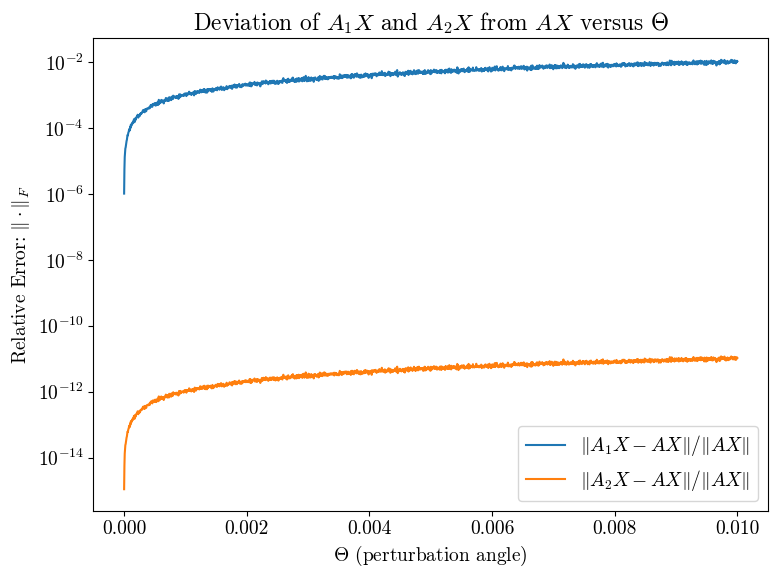

In [9]:
# Updated the output font for presentation purposes. Switched from sans serif to Computer Modern as used in LaTeX.
plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.family": "serif",
    "font.serif": ["cmr10"], "font.size":14  # Use Computer Modern Roman as the serif font
})


n, r = 100, 10
s = 2*r  # sketch size, can vary
n_sketches = 10  # average over random sketches
thetas = np.linspace(1e-6, 1e-2, 2000)
rel_err_A1_vs_A = []
rel_err_A2_vs_A = []

for theta in thetas:
    errs_A1 = []
    errs_A2 = []
    for _ in range(n_sketches):
        X = np.random.randn(n, s)
        # (Rebuild U_A, S_A, V_A1, V_A2, A, A1, A2 for current theta as before)
        # Prepare z (orthogonal to span(U_A), normed)
        z = np.random.randn(n, 1)
        z -= U_A @ (U_A.T @ z)
        z /= np.linalg.norm(z)

        # Case 1: perturb largest singular vector (col 0)
        V_A1 = U_A.copy()
        c, s_ = np.cos(theta), np.sin(theta)
        V_A1[:, [0]] = c * U_A[:, [0]] + s_ * z
        V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
        A1 = U_A @ S_A @ V_A1.T

        # Case 2: perturb smallest singular vector (col -1)
        V_A2 = U_A.copy()
        V_A2[:, [-1]] = c * U_A[:, [-1]] + s_ * z
        V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
        A2 = U_A @ S_A @ V_A2.T

        AX = A @ X
        A1X = A1 @ X
        A2X = A2 @ X

        # Compute relative errors
        errs_A1.append(np.linalg.norm(A1X - AX, 'fro') / np.linalg.norm(AX, 'fro'))
        errs_A2.append(np.linalg.norm(A2X - AX, 'fro') / np.linalg.norm(AX, 'fro'))
    rel_err_A1_vs_A.append(np.mean(errs_A1))
    rel_err_A2_vs_A.append(np.mean(errs_A2))

# --- Plotting ---
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(thetas, rel_err_A1_vs_A, label=r'$\|A_1 X - A X\|/\|A X\|$')
plt.plot(thetas, rel_err_A2_vs_A, label=r'$\|A_2 X - A X\|/\|A X\|$')
plt.yscale('log')
plt.xlabel(r'$\Theta$ (perturbation angle)')
plt.ylabel(r'Relative Error: $\|\cdot\|_F$')
plt.title(r'Deviation of $A_1 X$ and $A_2 X$ from $A X$ versus $\Theta$')
plt.legend()
plt.tight_layout()
plt.show()


1.0795577950205313e-13


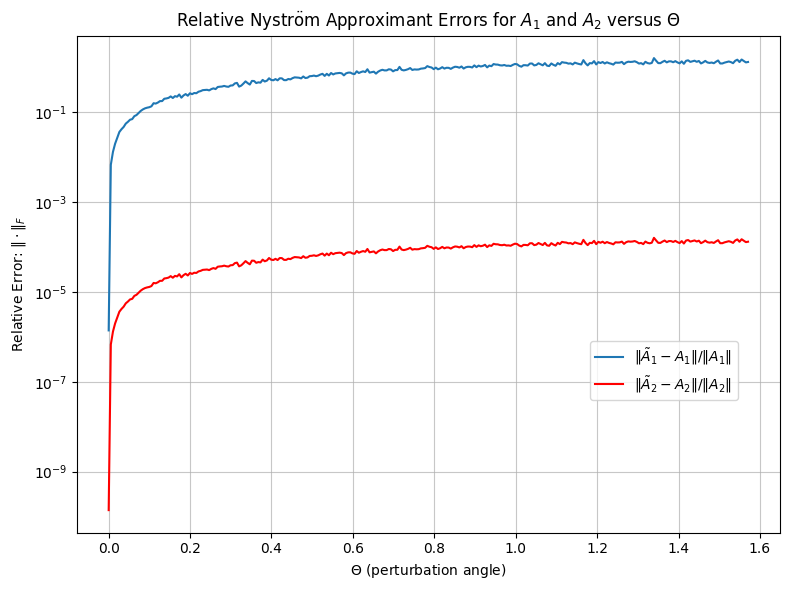

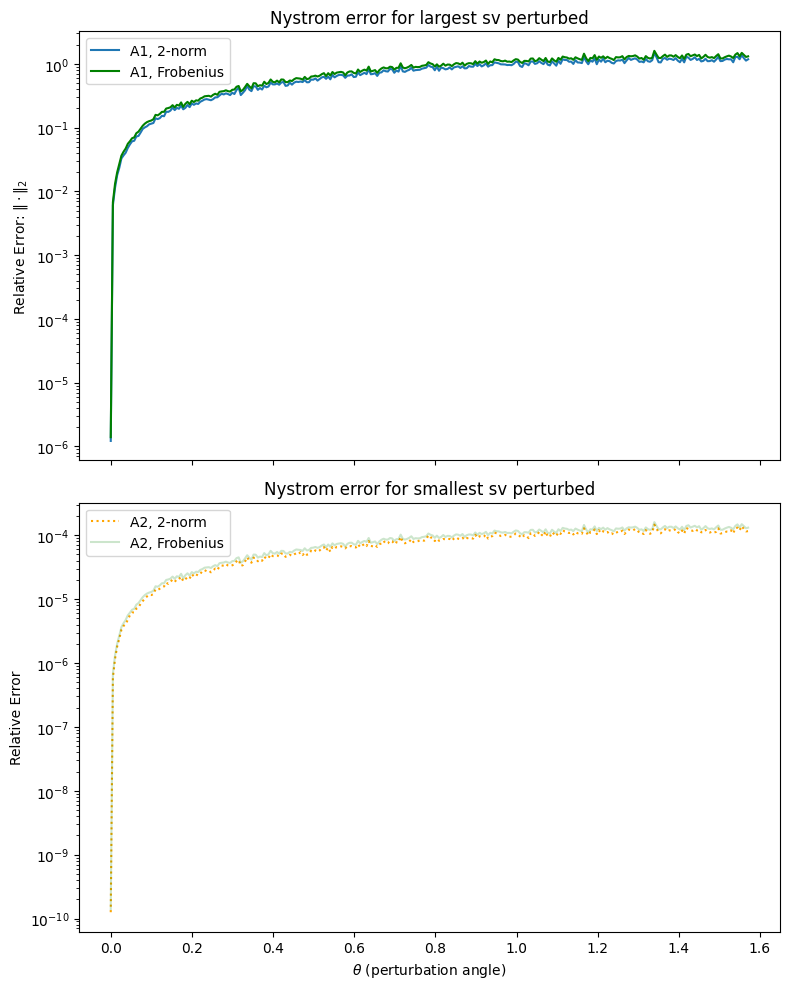

In [4]:
n, r = 100, 10
s = 2*r  # sketch size, can vary
n_sketches = 10  # average over random sketches
thetas = np.linspace(1e-6, np.pi / 2, 300) # this is in radians?
sing_vals_matrix = np.logspace(-4,0,r)[::-1]
S_A = np.diag(sing_vals_matrix)

A = U_A @ S_A @ U_A.T
for _ in range(n_sketches):
        X = np.random.randn(n, s)

        A_nyst = (A@X) @ np.linalg.pinv(X.T @ A @ X) @ (A @ X).T

        norm = np.linalg.norm(A - A_nyst, 'fro') / np.linalg.norm(A, 'fro')

average = np.median(norm)
print(average)


rel_err_A1_vs_A = []
rel_err_A2_vs_A = []
rel_err_A1_nyst_vs_A1 = []
rel_err_A2_nyst_vs_A2 = []
my_theorem = []
my_corol = []
my_theorem_2 = []
my_corol_2 = []
my_ep_2 = []

for theta in thetas:
    errs_A1 = []
    errs_A2 = []
    errs_A1_nyst = []
    errs_A2_nyst = []
    thm_A1_bound = []
    corol_A1_bound = []
    thm_A2_bound = []
    corol_A2_bound = []
    ep2_bound = []
    
    for _ in range(n_sketches):
        X = np.random.randn(n, s)
        # (Rebuild U_A, S_A, V_A1, V_A2, A, A1, A2 for current theta as before)
        # Prepare z (orthogonal to span(U_A), normed)
        z = np.random.randn(n, 1)
        z -= U_A @ (U_A.T @ z)
        z /= np.linalg.norm(z)

        # Case 1: perturb largest singular vector (col 0)
        V_A1 = U_A.copy()
        c, s_ = np.cos(theta), np.sin(theta)
        V_A1[:, [0]] = c * U_A[:, [0]] + s_ * z
        V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
        A1 = U_A @ S_A @ V_A1.T

        epsilon_tilde_1 = A1 - A1.T

        theorem_bound = np.sqrt(n*r) * np.linalg.norm(epsilon_tilde_1)/ np.linalg.norm(A1)
        corol_bound = (1 / (np.sqrt(s) - np.sqrt(r))) * np.linalg.norm(epsilon_tilde_1)/ np.linalg.norm(A1)
        thm_A1_bound.append(theorem_bound)
        corol_A1_bound.append(corol_bound)

        A1X = A1 @ X

        # make nystrom approx of A_1:
        A1_nyst = (A1X) @ np.linalg.pinv(X.T @ A1X) @ (A1X).T

        # Case 2: perturb smallest singular vector (col -1)
        V_A2 = U_A.copy()
        V_A2[:, [-1]] = c * U_A[:, [-1]] + s_ * z
        V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
        A2 = U_A @ S_A @ V_A2.T

        epsilon_tilde_2 = A2 - A2.T

        theorem_bound_2 = np.sqrt(n*r) * np.linalg.norm(epsilon_tilde_2, 'fro')/ np.linalg.norm(A2, 'fro')
        corol_bound_2 = (1 / (np.sqrt(s) - np.sqrt(r))) * np.linalg.norm(epsilon_tilde_2,'fro')/ np.linalg.norm(A2, 'fro')
        thm_A2_bound.append(theorem_bound_2)
        corol_A2_bound.append(corol_bound_2)

        A2X = A2 @ X

        epsilon_2 = A2 - A2.T
        ep2_bound.append(np.linalg.norm(epsilon_2,2))


        # make nystrom approx of this:
        A2_nyst = (A2X) @ np.linalg.pinv(X.T @ A2X) @ (A2X).T

        AX = A @ X ###### I have not changed the names of this code just bastardised it lololol

        # Compute relative errors
        errs_A1.append(np.linalg.norm(A1_nyst - A1, 2) / np.linalg.norm(A1, 2))
        errs_A2.append(np.linalg.norm(A2_nyst - A2, 2) / np.linalg.norm(A2, 2))
        errs_A1_nyst.append(np.linalg.norm(A1_nyst - A1, 'fro') / np.linalg.norm(A1, 'fro'))
        errs_A2_nyst.append(np.linalg.norm(A2_nyst - A2, 'fro') / np.linalg.norm(A2, 'fro'))
    my_theorem.append(np.mean(theorem_bound))
    my_corol.append(np.mean(corol_A1_bound))
    rel_err_A1_vs_A.append(np.mean(errs_A1))
    rel_err_A2_vs_A.append(np.mean(errs_A2))
    rel_err_A1_nyst_vs_A1.append(np.mean(errs_A1_nyst))
    rel_err_A2_nyst_vs_A2.append(np.mean(errs_A2_nyst))
    my_theorem_2.append(np.mean(thm_A2_bound))
    my_corol_2.append(np.mean(corol_A2_bound))
    my_ep_2.append(np.mean(ep2_bound))

# --- Plotting ---
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.plot(thetas, rel_err_A1_vs_A, label=r'$\|\tilde{A}_1 -  A_1\|/\|A_1\|$', color='C0', linestyle='-')
#plt.plot(thetas, my_theorem, label=r'thm bound (largest sv perturbed, 2 norm)', color='blue', linestyle='-')
#plt.plot(thetas, my_corol, label=r'corol bound (largest sv perturbed, 2 norm)', color='orange', linestyle='-')
#plt.plot(thetas, rel_err_A2_vs_A, label=r'$\|\tilde{A}_2 - A_2\|/\|A_2\|$', color='red', linestyle='-')
plt.plot(thetas, rel_err_A1_nyst_vs_A1, label=r'$\|\tilde{A}_1 - A_1\|/\|A_1\|$', color='C0', linestyle='-')
plt.plot(thetas, rel_err_A2_nyst_vs_A2, label=r'$\|\tilde{A}_2 - A_2\|/\|A_2\|$', color='red', linestyle='-')
#plt.plot(thetas, my_theorem_2, label=r'therem bound (smallest sv perturbed, 2 norm)', color='yellow', linestyle='-')
#plt.plot(thetas, my_corol_2, label=r'corol bound (smallest sv perturbed, 2 norm)', color='lightgreen', linestyle='-')
#plt.plot(thetas, my_ep_2, label=r'size of \epsilon_2 (smallest sv perturbed, 2 norm)', color='orange', linestyle='-')
plt.yscale('log')
plt.xlabel(r'$\Theta$ (perturbation angle)')
plt.ylabel(r'Relative Error: $\|\cdot\|_F$')
plt.title(r'Relative Nystr$\"\text{o}$m Approximant Errors for $A_1$ and $A_2$ versus $\Theta$')
plt.legend(bbox_to_anchor = (0.95, 0.40), loc = "upper right")
plt.tight_layout()
plt.grid(alpha = 0.7)
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(8,10), sharex=True)

# Top: largest sv perturbed
axs[0].plot(thetas, rel_err_A1_vs_A, label='A1, 2-norm', color='C0', linestyle='-')
axs[0].plot(thetas, rel_err_A1_nyst_vs_A1, label='A1, Frobenius', color='green', linestyle='-')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'Relative Error: $\|\cdot\|_2$')
axs[0].set_title('Nystrom error for largest sv perturbed')
axs[0].legend()

# Bottom: smallest sv perturbed
axs[1].plot(thetas, rel_err_A2_vs_A, label='A2, 2-norm', color='orange', linestyle=':')
axs[1].plot(thetas, rel_err_A2_nyst_vs_A2, label='A2, Frobenius', color='green', linestyle='-', alpha = 0.2)
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\theta$ (perturbation angle)')
axs[1].set_ylabel('Relative Error')
axs[1].set_title('Nystrom error for smallest sv perturbed')
axs[1].legend()

plt.tight_layout()
plt.show()

In [13]:
print(rel_err_A2_vs_A[:5])
print(rel_err_A2_nyst_vs_A2[:5])

[np.float64(7.535999101809304e-09), np.float64(1.0544412764293433e-08), np.float64(6.34593237488445e-09), np.float64(9.990709793218613e-09), np.float64(9.298210004155354e-09)]
[np.float64(7.54349162603846e-09), np.float64(1.054012051933896e-08), np.float64(6.367328171846861e-09), np.float64(9.993966733992763e-09), np.float64(9.27337764215334e-09)]
